In [3]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\")

In [7]:
import load_data as dat
import pandas as pd

In [8]:
## Importer les données
df_cdr = dat.load_csse_data()

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
35         0        0        0        0        0        0        0        0   
36         0        0        0        0        0        0        1        1   
37         0        0        0        0        0        0        0        0   
38         0        0        0        0        0        0        0        0   
39         0        0        0        0        0        0        0        0   
40         0        0        0        0        0        0        0        0   
41         0        0        0        0        0        0        0        0   
42         0        0        0        0        1        1        1        1   
43         0        0        0        0        0        0        0        0   
44         0        0        0        0        0        0        0        0   
45         0        0        0        0        0        0        0        0   
231        0        0        0        0        0    

/home_local/isduser/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
for df in df_cdr:
    ## On va supposer que le Covid peut durer au delà de 2020, inch'allah non
    nbr_years = int(df.columns[-1].split('/')[2]) - 19
    ## On regarde pour combien de mois différents on a des données sur la dernière année
    nbr_months = int(df.columns[-1].split('/')[0])
        
    for y in range(nbr_years):
        year = 20 + y
        
        ## Si on a une année entière de données alors on passe sur tous les mois, sinon on s'arrête au dernier mois disponible pour l'année en cours
        if(year < 19 + nbr_years):
            max_month = 12
        else:
            max_month = nbr_months 
            
        for m in range(max_month):
            ## On filtre le DataFrame en ne gardant que les colonnes correspondant à l'année qui nous intéresse
            yearCols = df[[c for c in df if c.endswith(str(year))]]
            ## On récupère ensuite uniquement la dernière colonne disponible pour chaque mois, elle contient le nombre de cas confirmés au mois m
            valuesCol = df[[c for c in yearCols if c.startswith(str(m+1))]].columns[-1]
            df[str(m+1)+'/20'+str(year)] = df[valuesCol]

AttributeError: 'str' object has no attribute 'columns'

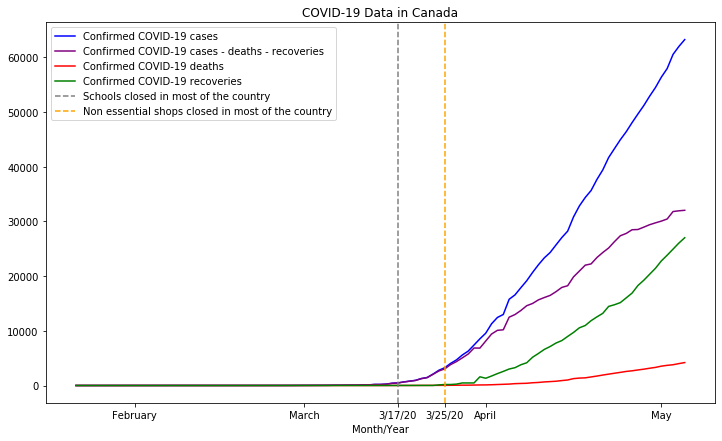

In [6]:
import matplotlib.pyplot as plt
import re
import numpy as np

#### Perhaps not the most straightforward implementation but well.. it works
#### Probably easier by converting columns name from string to datetime

## Extract the values we'll use to plot
x_0 = df_cdr[0][[c for c in df_cdr[0] if re.search(r'/([0-9]|[0-9]{2})/[0-9]{2}$', c)]].sum()
x_1 = df_cdr[1][[c for c in df_cdr[1] if re.search(r'/([0-9]|[0-9]{2})/[0-9]{2}$', c)]].sum()
x_2 = df_cdr[2][[c for c in df_cdr[2] if re.search(r'/([0-9]|[0-9]{2})/[0-9]{2}$', c)]].sum()

## Extract the plots' y values
y_0 = x_0.values
y_1 = x_1.values
y_2 = x_2.values
xvals = x_0.index

## Extract the plots' x values
plt.figure(figsize=(12,7))
y_infected = y_0 - y_1 - y_2

## Plots everything on the same graph
plt.plot(xvals, y_0, label="Confirmed COVID-19 cases", color='blue')
plt.plot(xvals, y_infected, label="Confirmed COVID-19 cases - deaths - recoveries", color='purple')
plt.plot(xvals, y_1, label="Confirmed COVID-19 deaths", color='red')
plt.plot(xvals, y_2, label="Confirmed COVID-19 recoveries", color='green')

## Add constant lines to show various breakpoints
plt.axvline(x='3/17/20', label='Schools closed in most of the country', color='gray', linestyle='dashed')
plt.axvline(x='3/25/20', label='Non essential shops closed in most of the country', color='orange', linestyle='dashed')

## Set custom ticks to avoid overloading the x axis
plt.xticks(ticks=['2/1/20', '3/1/20', '3/17/20', '3/25/20', '4/1/20', '5/1/20'], labels=['February', 'March', '3/17/20', '3/25/20', 'April', 'May'])
plt.title("COVID-19 Data in Canada")
plt.xlabel('Month/Year')
plt.legend(loc=2)

plt.show()

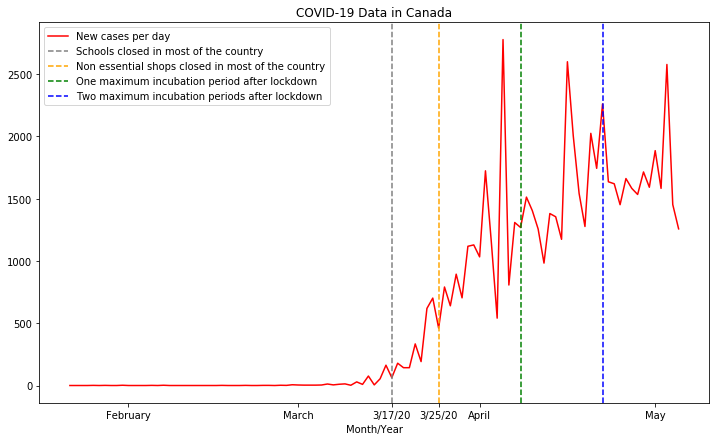

In [7]:
#### Perhaps not the most straightforward implementation but well.. it works
#### Probably easier by converting columns name from string to datetime

## On convertit toutes les valeurs en faisant la différence entre nombre de cas au jour J - nombre de cas au jour J-1
df_cdr_diff = []
for df in df_cdr:
    df_cdr_diff.append(df[[c for c in df if re.search(r'/([0-9]|[0-9]{2})/[0-9]{2}$', c)]].diff(axis=1))
    
## Extract the values we'll use to plot
x_0 = df_cdr[0][[c for c in df_cdr[0] if re.search(r'/([0-9]|[0-9]{2})/[0-9]{2}$', c)]].sum()
x_0_diff = df_cdr_diff[0].sum()

## Extract the plots' y values
y_0 = x_0.values
y_0_diff = x_0_diff.values

## Extract the plots' x values
xvals = x_0_diff.index
plt.figure(figsize=(12,7))

## Plots everything on the same graph
plt.plot(xvals, y_0_diff, label="New cases per day", color='red')

## Add constant lines to show various breakpoints
plt.axvline(x='3/17/20', label='Schools closed in most of the country', color='gray', linestyle='dashed')
plt.axvline(x='3/25/20', label='Non essential shops closed in most of the country', color='orange', linestyle='dashed')
plt.axvline(x='4/8/20', label='One maximum incubation period after lockdown', color='green', linestyle='dashed')
plt.axvline(x='4/22/20', label='Two maximum incubation periods after lockdown', color='blue', linestyle='dashed')

## Set custom ticks to avoid overloading the x axis
plt.xticks(ticks=['2/1/20', '3/1/20', '3/17/20', '3/25/20', '4/1/20', '5/1/20'], labels=['February', 'March', '3/17/20', '3/25/20', 'April', 'May'])
plt.title("COVID-19 Data in Canada")
plt.xlabel('Month/Year')
plt.legend(loc=2)

plt.show()

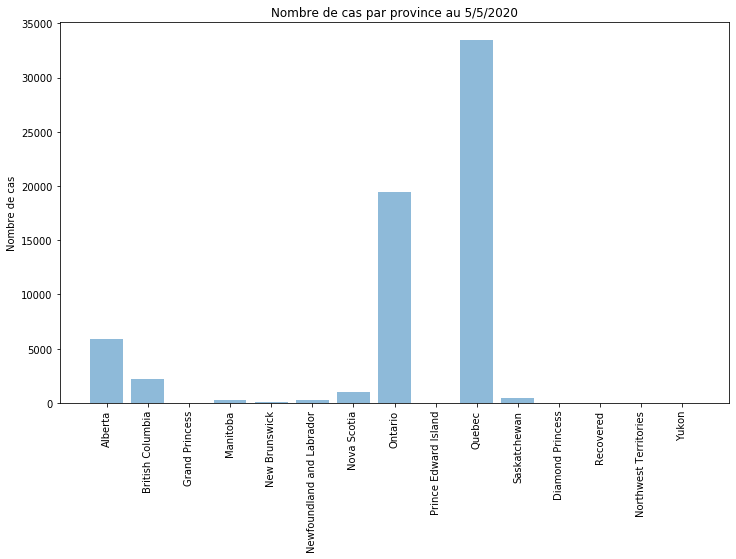

In [33]:
x = df_cdr[0]['5/5/20'].values
objects = df_cdr[0]['Province/State'].values
y_pos = np.arange(len(objects))

plt.figure(figsize=(12,7))
plt.bar(y_pos, x, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas par province au 5/5/2020')

plt.show()